<a href="https://colab.research.google.com/github/ArthurRoque/nocoes_de_simulacao/blob/main/No%C3%A7%C3%B5es_de_Simula%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolução de exercícios do Capítulo 9 - Bussab
## _Noções de Simulação_

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Introdução


### Problema 5

Use algum programa ou planilha computacional para gerar 10.000 números pseudo-aleatórios. Faça um histograma e um box
plot desses valores. Esses gráficos corroboram o fato de que esses números obtidos são observações de uma v.a. com
distribuição uniforme no intervalo (0, 1)? Explique.

In [2]:
np.random.seed(4040)
u = np.random.rand(10000)

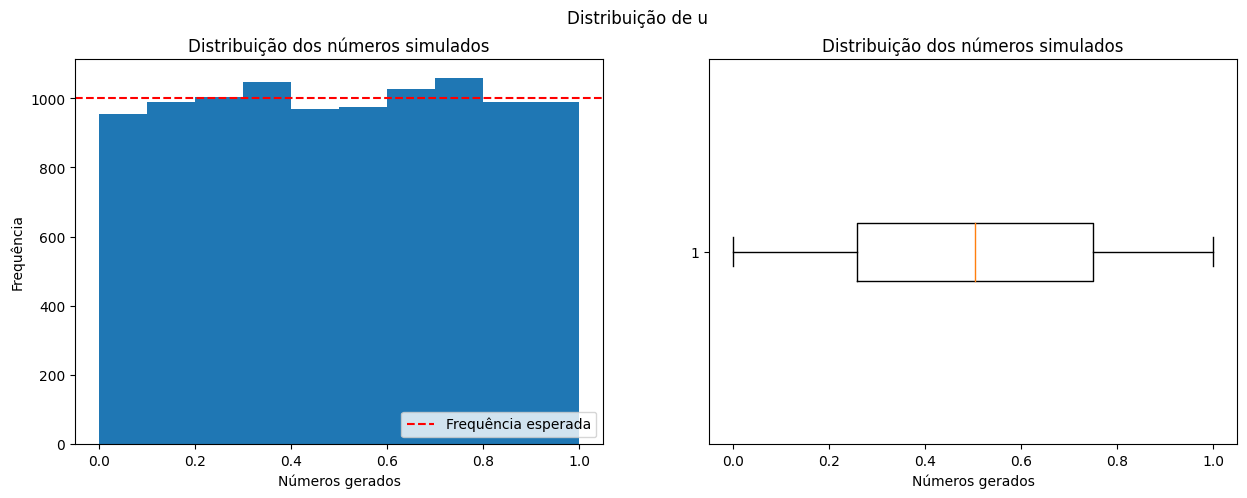

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].hist(x=u, bins=np.arange(0, 1.1, 0.1))
axs[0].set_xlabel('Números gerados')
axs[0].set_ylabel('Frequência')
axs[0].set_title('Distribuição dos números simulados')
axs[0].axhline(1000, color='red', label='Frequência esperada', linestyle='--')
axs[0].legend(loc='lower right')

axs[1].boxplot(u, vert=False)
axs[1].set_xlabel('Números gerados')
axs[1].set_title('Distribuição dos números simulados')

fig.suptitle('Distribuição de u')
plt.show()

In [4]:
# Se a variável aleatória (u) em questão seguir distribuição uniforme, então:
# E(u) = (0 + 1) / 2
# Var(u) = (1 - 0)² / 12
# assimetria (skewness) esperada: 0
# Curstose esperada: -1.2

from scipy.stats import uniform, skew, kurtosis
mean, var, skewness, kurt = uniform.stats(moments='mvsk')

print(f'E(u) = {mean}; Média observada: {round(np.mean(u), 4)}')
print(f'Var(u) = {round(var, 4)}; Variância observada: {round(np.var(u), 4)}')
print(f'Skew(u) = {skewness}; Skewness observada: {round(skew(u), 4)}')
print(f'Kurt(u) = {kurt}; Kurtosis observada: {round(kurtosis(u), 4)}')

E(u) = 0.5; Média observada: 0.5029
Var(u) = 0.0833; Variância observada: 0.0825
Skew(u) = 0.0; Skewness observada: -0.0154
Kurt(u) = -1.2; Kurtosis observada: -1.192


Com base nas figuras geradas e nos momentos calculados da nossa amostra aleatória, pode-se verificar que a variável aleatória u segue distribuição uniforme entre zero e um.

## Simulação de variáveis aleatórias

De posse de um gerador de números aleatórios uniforme [0,1] pode-se, em princípio, gerar números aleatórios de qualquer outra variável aleatória utilizando sua correspondente *Função de Distribuição Acumulada* (f.d.a).

1. _Caso contínuo_

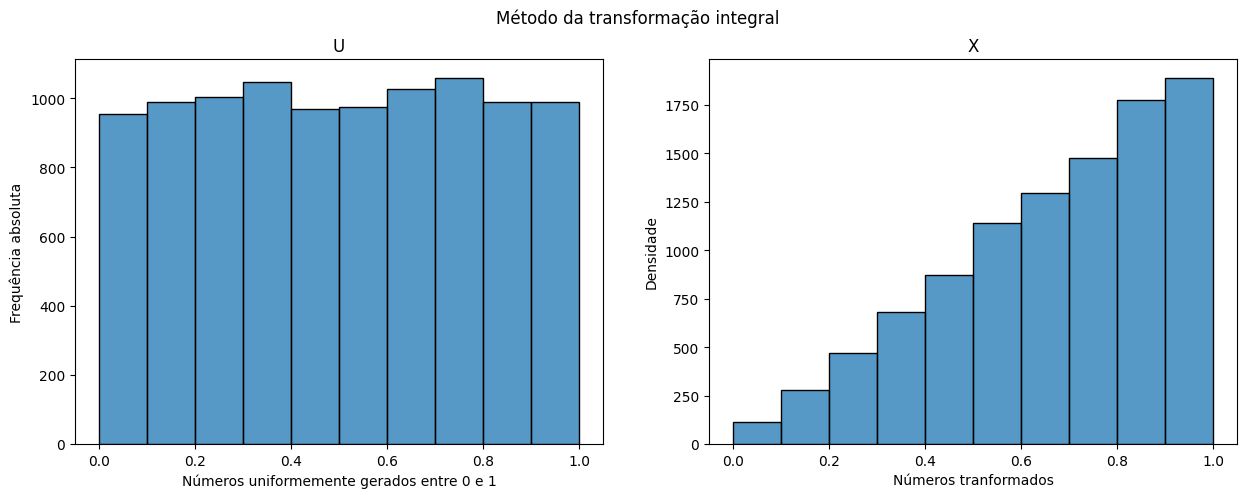

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(u, bins=np.arange(0, 1.1, 0.1), ax=axs[0])
axs[0].set_xlabel('Números uniformemente gerados entre 0 e 1')
axs[0].set_ylabel('Frequência absoluta')
axs[0].set_title('U')

sns.histplot(np.sqrt(u), bins=np.arange(0, 1.1, 0.1), ax=axs[1])
axs[1].set_xlabel('Números tranformados')
axs[1].set_ylabel('Densidade')
axs[1].set_title('X')

fig.suptitle('Método da transformação integral')
plt.show()

2. _Caso discreto_

Considere a v.a X com distribuição (mass function):

$$X: 0, 1, 2 $$<br>
$$p_i = \frac{1}{4}, \frac{1}{2}, \frac{1}{4}$$

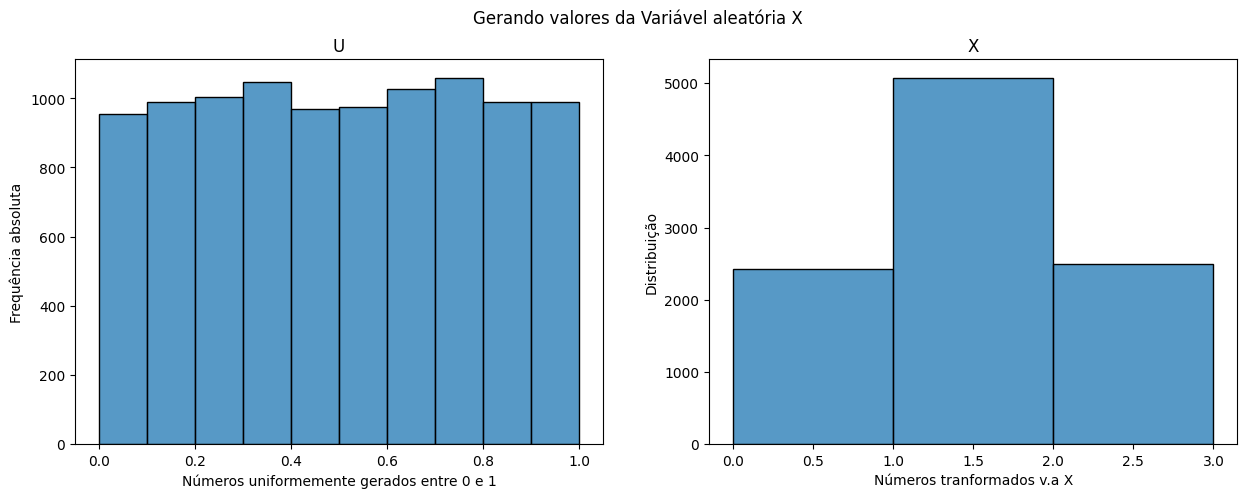

In [6]:
condicoes = [u < 0.25, (u >= 0.25) & (u < 0.75), u >= 0.75]
X = np.select(condicoes, [0,1,2], default=u)

fig, axs = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(u, bins=np.arange(0, 1.1, 0.1), ax=axs[0])
axs[0].set_xlabel('Números uniformemente gerados entre 0 e 1')
axs[0].set_ylabel('Frequência absoluta')
axs[0].set_title('U')

sns.histplot(X, bins=np.arange(0,4,1), ax=axs[1])
axs[1].set_xlabel('Números tranformados v.a X')
axs[1].set_ylabel('Distribuição')
axs[1].set_title('X')

fig.suptitle('Gerando valores da Variável aleatória X')
plt.show()

### Problema 6
Gere cinco valores da v.a. X, cuja distribuição é dada por: <br>

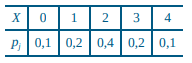

In [7]:
uniforme = np.random.rand(5)

condicoes = [ uniforme < 0.1,
 (uniforme >= 0.1) & (uniforme < 0.3),
 (uniforme >= 0.3) & (uniforme < 0.7),
 (uniforme >= 0.7) & (uniforme < 0.9),
 (uniforme >= 0.9) & (uniforme < 1)
]

valores_X = [0,1,2,3,4]
X = np.select(condicoes, valores_X, default=uniforme)
X

array([2., 2., 2., 1., 3.])

### Problema 7
 Gere dez valores da v.a T do Problema 17 do Capítulo 6.

 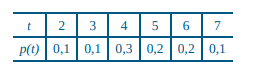

In [8]:
uniforme = np.random.rand(10)
condicoes = [
    uniforme < 0.1,
    (uniforme >= 0.1) & (uniforme < 0.2),
    (uniforme >= 0.2) & (uniforme < 0.5),
    (uniforme >= 0.5) & (uniforme < 0.7),
    (uniforme >= 0.7) & (uniforme < 0.9),
    (uniforme >= 0.9) & (uniforme < 1)
]
valores_T = [2,3,4,5,6,7]
T = np.select(condicoes, valores_T, default=uniforme)
T

array([2., 2., 5., 2., 3., 4., 5., 5., 2., 4.])

### Problema 8
Considere a v.a. X contínua com f.d.p. <br>
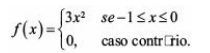

Como você procederia para obter um valor simulado de X? Se u = 0,5, qual será o valor correspondente gerado de X?


---



Para obter um valore simulado de X, basta aplicar ao N.A. (número aleatório) que segue Uniforme [0,1] a função de probabilidade acumulada. <br><br>
1° passo: Determinar a função acumulada.

$$ F(x) = \int_{-1}^{0} f(x) dx  \: =  \: \int_{-1}^{0} 3 x ^2 dx $$

Isto é: $$ F(x) = x^3 \: | \: x \in [-1,0] $$

2° passo: Aplicar a função inversa de F(x) em u. <br>
Uma vez que se tem a função acumuada, para gerar o valor aleatório de X, é preciso aplicar a função inversa de F(x) em u, pois se

$$ F(x) = u $$

então:

$$ x = F^{-1}(u) $$

In [9]:
uniforme = np.random.rand(1)
print(f'Número aleatório ~X: {np.power(uniforme, 1/3)}')
print(f'Se u for 0.5, o valor correspondente de x será {round(np.power(0.5, 1/3), 3)}')

Número aleatório ~X: [0.82420825]
Se u for 0.5, o valor correspondente de x será 0.794


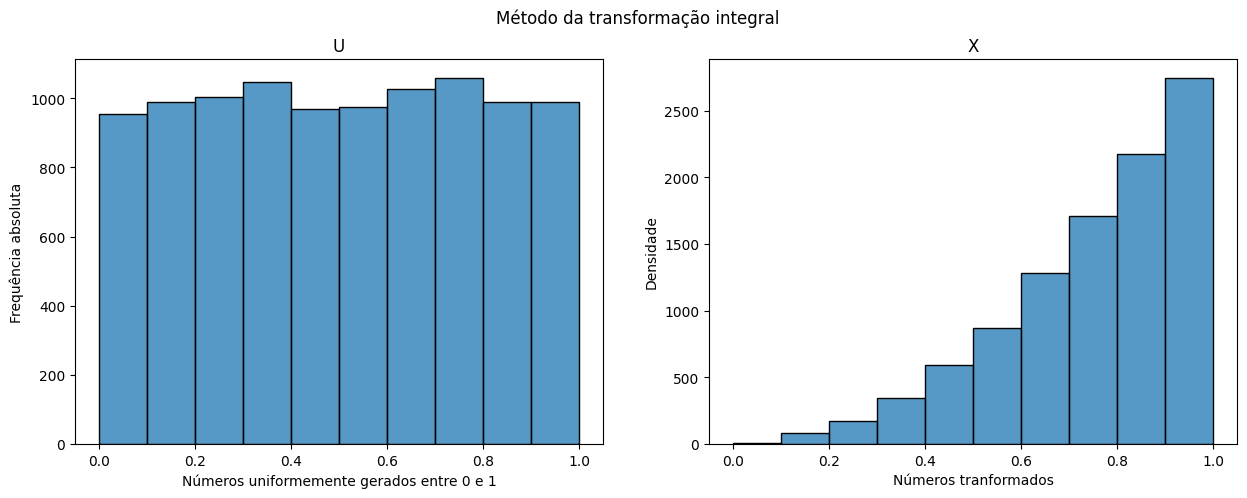

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(u, bins=np.arange(0, 1.1, 0.1), ax=axs[0])
axs[0].set_xlabel('Números uniformemente gerados entre 0 e 1')
axs[0].set_ylabel('Frequência absoluta')
axs[0].set_title('U')

sns.histplot(np.power(u, 1/3), bins=np.arange(0, 1.1, 0.1), ax=axs[1])
axs[1].set_xlabel('Números tranformados')
axs[1].set_ylabel('Densidade')
axs[1].set_title('X')

fig.suptitle('Método da transformação integral')
plt.show()

## Simulação de Alguns Modelos

### Problema 9
 Gere dez valores de uma distribuição de Bernoulli, com p = 0,35.

In [11]:
u = np.random.rand(10)
np.select([u >= 0.35, u < 0.35], [0,1], default=u)

array([1., 0., 0., 0., 0., 0., 1., 0., 1., 1.])

### Problema 10
Obtenha dez valores de uma v.a. Y ∼ b(10; 0,2).


In [12]:
y = []
n = 10
p = 0.2

for i in range(n):
  u = np.random.rand(10)
  bernoulli = np.select([u >= p, u < p], [0,1], default=u)
  y.append(bernoulli)

y

[array([1., 0., 0., 0., 1., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 1., 0., 0., 1., 0., 0., 1., 0.])]

### Problema 11
 Usando o procedimento do Exemplo 9.10, gere dez valores de uma distribuição exponencial com parâmetro β = 1/2.


In [13]:
u = np.random.rand(10)
beta = 1/2

t = -beta * np.log(u)
t

array([0.9120375 , 0.78333886, 0.30346499, 0.4947387 , 0.66469113,
       0.15863995, 0.15261557, 0.19024791, 1.05004129, 0.1117899 ])

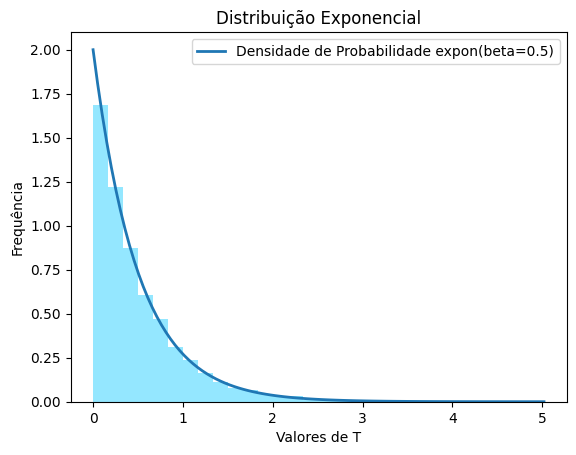

In [14]:
# Visualizando valores simulados distribuição exponencial
u = np.random.rand(10000)
t = -beta * np.log(u)

from scipy.stats import expon


exponencial = expon(scale=beta)
eixo_x = np.linspace(0, max(t),100)
eixo_y = exponencial.pdf(eixo_x)

plt.plot(eixo_x, eixo_y, lw=2, label='Densidade de Probabilidade expon(beta=0.5)')
plt.hist(t, bins=30, density=True, color = '#94e7ff')
plt.legend()

plt.xlabel('Valores de T')
plt.ylabel('Frequência')
plt.title('Distribuição Exponencial')

plt.show()

### Problema 12
Usando o Teorema 9.1, gere:

#### **A**  
Cinco valores da v.a. do Exemplo 9.6; <br>
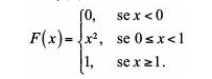

In [15]:
u = np.random.rand(5)
np.sqrt(u)

array([0.51198691, 0.93480506, 0.24761008, 0.58129491, 0.89917718])

#### B
Dez valores de uma distribuição N(10; 4);

In [16]:
from scipy.stats import norm

loc = 10
scale = 2

u = np.random.rand(10)
x = loc + scale * norm.ppf(u)
x

array([11.49950978, 10.9499121 , 12.9181851 ,  8.81695139, 10.92247349,
       10.17138116,  9.36471396, 14.17015554,  9.86296684,  9.89564472])

#### C
Dez valores de uma distribuição t de Student com 24 graus de liberdade.

In [17]:
from scipy.stats import t

student = t(24)
u = np.random.rand(10)
x = student.ppf(u)
x

array([-0.15343122, -1.3370563 , -0.69180307,  0.55253184,  1.18983533,
       -2.46966622, -1.20428878, -0.08800635,  0.91410039, -0.53211656])

### Problema 14
Gere dez valores de uma distribuição qui-quadrado com três graus de liberdade.

In [18]:
def qui_quadrado(n, gl):
  chi = np.zeros(n)

  for i in range(gl):
    u = np.random.rand(n)
    chi += norm.ppf(u) ** 2

  return chi

qui_quadrado(10, 3)

array([2.47529342, 2.44405171, 2.93181152, 3.35743499, 1.17373529,
       0.45755793, 0.28926882, 3.63766777, 4.59239609, 3.34923074])

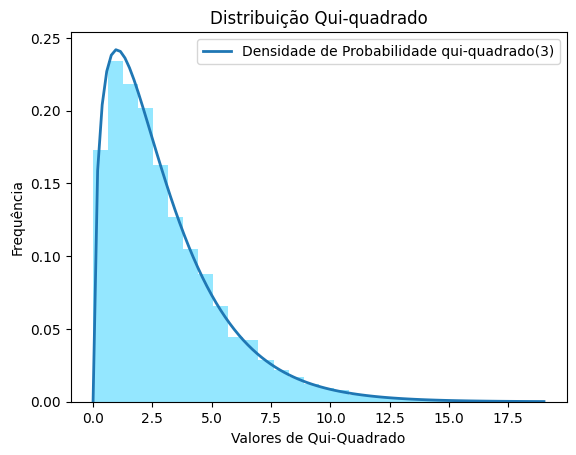

In [19]:
# Visualizando valores simulados distribuição qui-quadrado

from scipy.stats import chi2

chi = qui_quadrado(10000, 3)

scipy_chisqr = chi2(3)
eixo_x = np.linspace(0, max(chi),100)
eixo_y = scipy_chisqr.pdf(eixo_x)

plt.plot(eixo_x, eixo_y, lw=2, label='Densidade de Probabilidade qui-quadrado(3)')
plt.hist(chi, bins=30, density=True, color = '#94e7ff')
plt.legend()

plt.xlabel('Valores de Qui-Quadrado')
plt.ylabel('Frequência')
plt.title('Distribuição Qui-quadrado')

plt.show()

## Exemplos Computacionais

### Problema 15
Usando um pacote computacional de sua prefereência

#### A
Gere 100 valores de uma distribuição binomial, com parâmetros n = 15 e p = 0.7

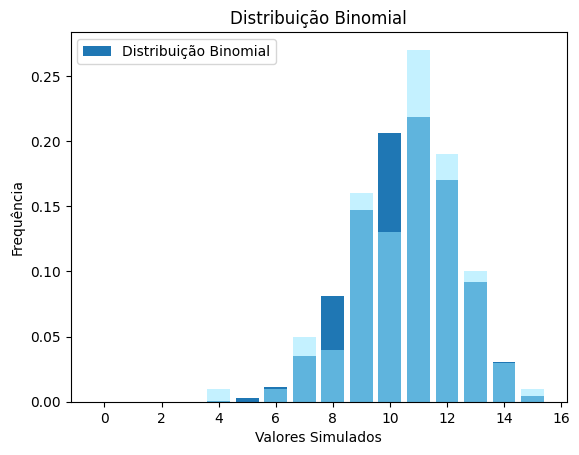

In [20]:
import scipy.stats as stats

binomial = stats.binom(n = 15, p = 0.7)

#Gera valores simulados e conta a frequência de cada valor
x = binomial.rvs(100)
valores, contagem = np.unique(x, return_counts=True)

eixo_x = np.arange(0,16,1)
eixo_y = binomial.pmf(eixo_x)

plt.bar(eixo_x, eixo_y, lw=2, label='Distribuição Binomial')
plt.bar(valores, contagem/len(x), color = '#94e7ff', alpha=0.55)
#plt.hist(x, bins=np.arange(0, 16), density=True, alpha=0.9, color='#94e7ff')
plt.legend()

plt.xlabel('Valores Simulados')
plt.ylabel('Frequência')
plt.title('Distribuição Binomial')

plt.show()

#### B
Gere 500 valores de uma distribuição de Poisson com parâmeto λ = 1.3

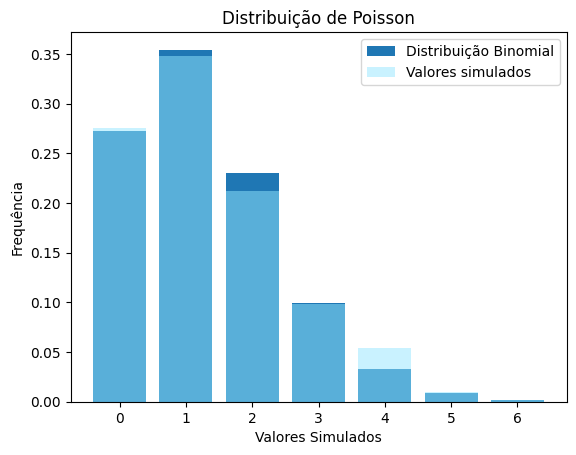

In [21]:
poisson = stats.poisson(mu=1.3)


#Gera valores simulados e conta a frequência de cada valor
x = poisson.rvs(500)
valores, contagem = np.unique(x, return_counts=True)

eixo_x = np.arange(0,max(valores) + 1,1)
eixo_y = poisson.pmf(eixo_x)

plt.bar(eixo_x, eixo_y, lw=2, label='Distribuição Binomial')
plt.bar(valores, contagem/len(x), color = '#94e7ff', alpha=0.5, label='Valores simulados')
#plt.hist(x, bins=np.arange(0, 16), density=True, alpha=0.9, color='#94e7ff')
plt.legend()

plt.xlabel('Valores Simulados')
plt.ylabel('Frequência')
plt.title('Distribuição de Poisson')

plt.show()

### Problema 16 (Box plots e Ramo e Folhas AQUI)
Usando um pacote computacional de sua prefereência, gere:

#### A
500 valores de uma normal padrão;

In [22]:
va_norm = stats.norm().rvs(500)

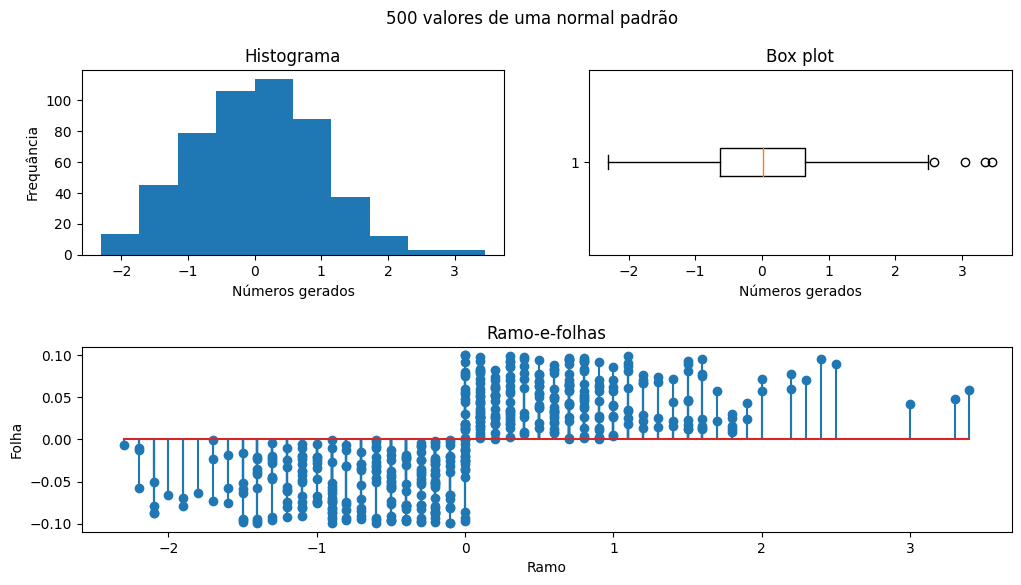

In [23]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.5)
ax1 = plt.subplot(2,2,1) # subplot terá: 2 linhas, 2 colunas na 1° linha. Sendo ax1 = 1° coluna
ax2 = plt.subplot(2,2,2) # 2 linhas, 2 colunas na 1° linha. Sendo ax2 = 2° coluna
ax3 = plt.subplot(2,1,2) # 2 linhas, 1 coluna. Sendo ax3 = 1° e 2° coluna
axes = [ax1, ax2, ax3]

# Histograma
ax1.hist(x=va_norm, bins=10)
ax1.set_ylabel('Frequância')
ax1.set_xlabel('Números gerados')
ax1.set_title('Histograma')

# Box-plot
ax2.boxplot(va_norm, vert=False)
ax2.set_xlabel('Números gerados')
ax2.set_title('Box plot')


# Ramo e folhas
stems = np.trunc(va_norm * 10) / 10
ax3.stem(stems, va_norm - stems)
ax3.set_ylabel('Folha')
ax3.set_xlabel('Ramo')
ax3.set_title('Ramo-e-folhas')


plt.suptitle('500 valores de uma normal padrão')
plt.show()

#### B
1.000 valores de uma distribuição qui-quadrado com cinco graus de liberdade;

In [24]:
va_qui_quadrado = stats.chi2(df=5).rvs(1000)

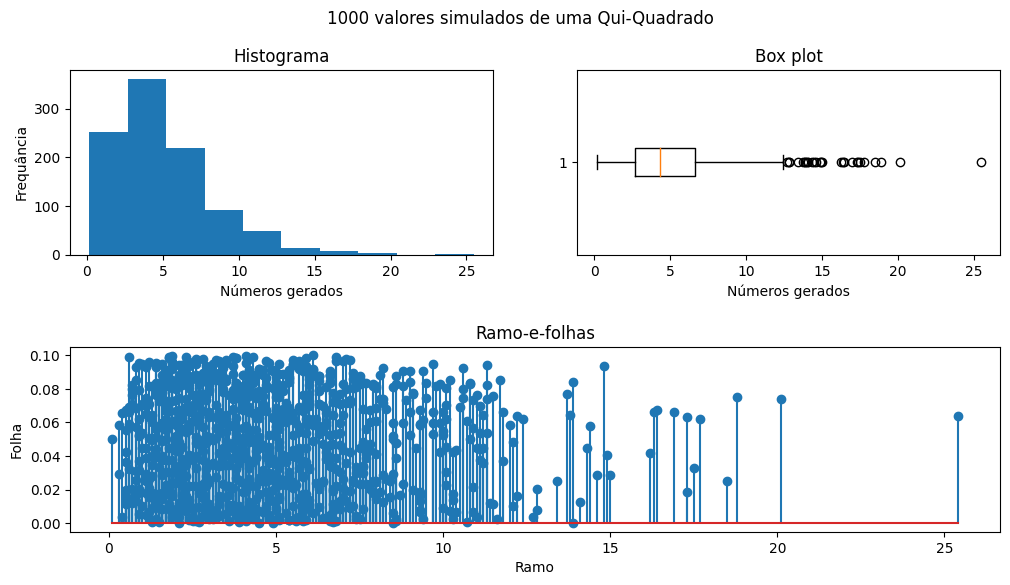

In [25]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.5)
ax1 = plt.subplot(2,2,1) # subplot terá: 2 linhas, 2 colunas na 1° linha. Sendo ax1 = 1° coluna
ax2 = plt.subplot(2,2,2) # 2 linhas, 2 colunas na 1° linha. Sendo ax2 = 2° coluna
ax3 = plt.subplot(2,1,2) # 2 linhas, 1 coluna. Sendo ax3 = 1° e 2° coluna
axes = [ax1, ax2, ax3]

# Histograma
ax1.hist(x=va_qui_quadrado, bins=10)
ax1.set_ylabel('Frequância')
ax1.set_xlabel('Números gerados')
ax1.set_title('Histograma')

# Box-plot
ax2.boxplot(va_qui_quadrado, vert=False)
ax2.set_xlabel('Números gerados')
ax2.set_title('Box plot')


# Ramo e folhas
stems = np.trunc(va_qui_quadrado * 10) / 10
ax3.stem(stems, va_qui_quadrado - stems)
ax3.set_ylabel('Folha')
ax3.set_xlabel('Ramo')
ax3.set_title('Ramo-e-folhas')


plt.suptitle('1000 valores simulados de uma Qui-Quadrado')
plt.show()

#### C
800 valores de uma distribuição exponencial com parâmetro 3.


In [26]:
va_expon = stats.expon(3).rvs(800)

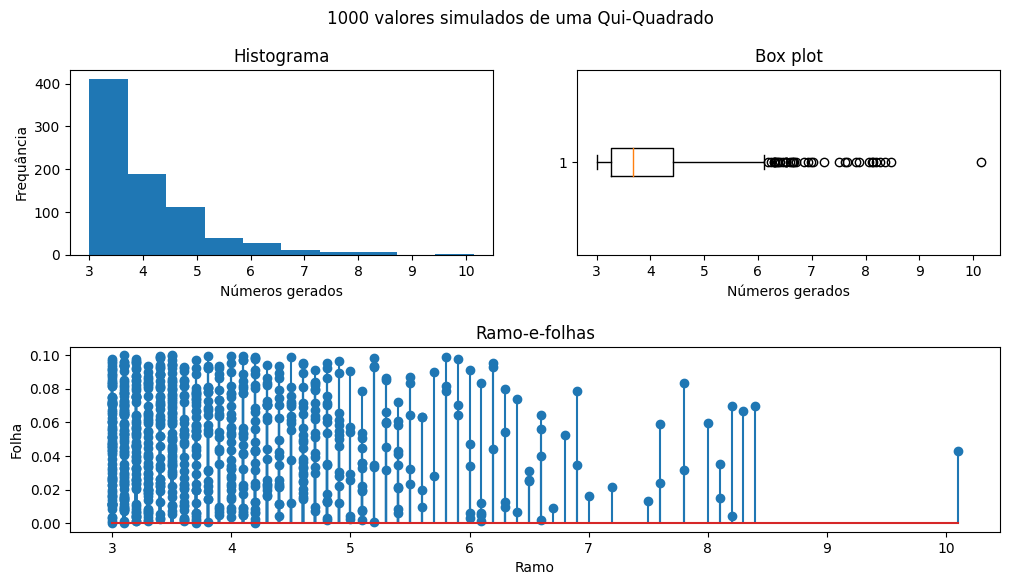

In [27]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.5)
ax1 = plt.subplot(2,2,1) # subplot terá: 2 linhas, 2 colunas na 1° linha. Sendo ax1 = 1° coluna
ax2 = plt.subplot(2,2,2) # 2 linhas, 2 colunas na 1° linha. Sendo ax2 = 2° coluna
ax3 = plt.subplot(2,1,2) # 2 linhas, 1 coluna. Sendo ax3 = 1° e 2° coluna
axes = [ax1, ax2, ax3]

# Histograma
ax1.hist(x=va_expon, bins=10)
ax1.set_ylabel('Frequância')
ax1.set_xlabel('Números gerados')
ax1.set_title('Histograma')

# Box-plot
ax2.boxplot(va_expon, vert=False)
ax2.set_xlabel('Números gerados')
ax2.set_title('Box plot')


# Ramo e folhas
stems = np.trunc(va_expon * 10) / 10
ax3.stem(stems, va_expon - stems)
ax3.set_ylabel('Folha')
ax3.set_xlabel('Ramo')
ax3.set_title('Ramo-e-folhas')


plt.suptitle('1000 valores simulados de uma Qui-Quadrado')
plt.show()

### Problema 17

Usando o método de Box-Müller, gere cinco valores de uma distribuição normal padrão.

In [28]:
u1 = np.random.rand(5)
u2 = np.random.rand(5)

z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2*np.pi*u2) # v.a ~ N(0,1)
z2 =  np.sqrt(-2 * np.log(u1)) * np.sin(2*np.pi*u2) # v.a ~ N(0,1)

z = z1 + z2 # A soma de duas v.a's ~ N(0,1) resulta em uma v.a ~ N(0,1)
z

array([-0.17912623,  1.76712482,  0.00305419, -1.92657459, -1.38019226])

# Problemas Suplementares

## Problema 18
O método dos quadrados centrais de von Neumann opera do modo descrito a seguir. Considere um inteiro $n_0$ com m dígitos e seu quadrado $n_0^2$, que terá 2m dígitos (eventualmente acrescentando zeros à esquerda). Tome os dígitos centrais de $n_0^2$ e divida o número obtido por $10^m$ para se obter um NA, $u_0$
, entre 0 e 1. Continue, tomando $n_1$ como o número inteiro central desse passo. <br><br>

Obtenha números aleatórios, com m = 3, usando esse método.


In [29]:
def digitos_centrais(digito):
  digito = str(digito)
  if len(digito) % 2 == 1:
    digito = '0' + digito
  return int(digito[ int(len(digito)/2) - 1 : int(len(digito)/2 + 1)])

<Axes: >

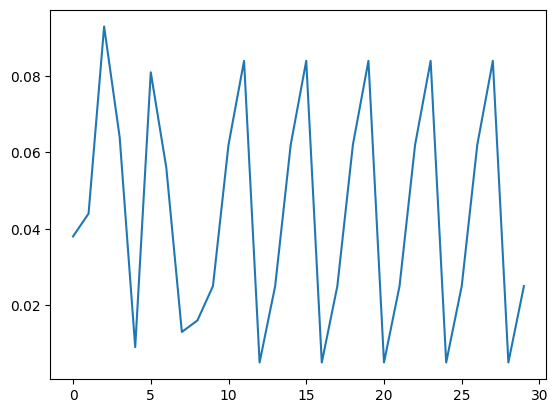

In [30]:
import datetime
# Obtendo o valor n0 a partir da hora.

m = 3
n = int(datetime.datetime.now().timestamp()) * 7
pseudo_aleatorios = []

for i in range(30):
  n = digitos_centrais(n ** 2)
  pseudo_aleatorios.append(n / 10 ** m)

sns.lineplot(pseudo_aleatorios)

## Problema 19

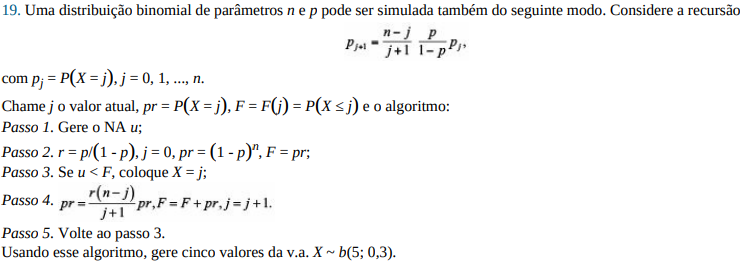

In [31]:
# O algoritmo consise no que seria gerar os valores com as respectivas probabilidades.
# Porém, ao inves de ter os valores j e p_j tabulados, o algoritmo as calcula de forma recursiva.

n = 5
p = 0.3

valor_x = 0
prob_valor_x = (1-p) ** n # Probabilidade x = 0.
F = prob_valor_x

for _ in range(0, n+1):
  print(f'A probabilidade de X assumir o valor {valor_x} é de: {round(prob_valor_x, 4)}. F(j) = {F}')
  prob_valor_x *=  (n - valor_x) / (valor_x + 1) * (p / (1-p))
  valor_x += 1
  F += prob_valor_x


A probabilidade de X assumir o valor 0 é de: 0.1681. F(j) = 0.16806999999999994
A probabilidade de X assumir o valor 1 é de: 0.3601. F(j) = 0.5282199999999999
A probabilidade de X assumir o valor 2 é de: 0.3087. F(j) = 0.8369199999999999
A probabilidade de X assumir o valor 3 é de: 0.1323. F(j) = 0.9692199999999999
A probabilidade de X assumir o valor 4 é de: 0.0284. F(j) = 0.9975699999999998
A probabilidade de X assumir o valor 5 é de: 0.0024. F(j) = 0.9999999999999999


In [32]:
# Agora, tendo um gerador de números aleatórios U[0,1], basta que u represente a probabilidade. E assim a convertemos no valor da v.a.

n = 5
p = 0.3
X = []

for u in np.random.rand(1000):

  j = 0 # valor inicial
  pr = (1 - p) ** n # probabilidade pontual P(X = j). Começa com P(X = 0).
  F = pr # acumulada. P(X <= 0).

  x = False

  while not x:
    if u < F:
      X.append(j)
      x = True

    pr *= p/(1-p)*(n-j) / (j + 1)
    F += pr
    j += 1

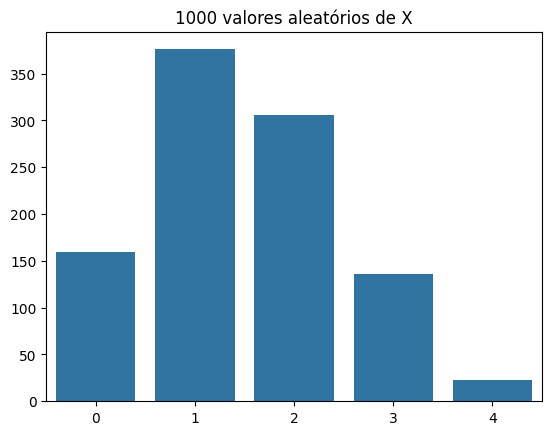

In [33]:
valores, frequencia = np.unique(X, return_counts=True)

sns.barplot(x=valores, y=frequencia)
plt.title('1000 valores aleatórios de X')
plt.show()

_Outra maneira de gerar os valores utilizando o método DIGITIZE do numpy_

In [34]:
n = 5
p = 0.3
valores_F = np.cumsum(stats.binom(n, p).pmf(np.arange(0, n-1)))

In [35]:
u = np.random.rand(1000)
valores_binom = np.digitize(u, bins=valores_F, right=True)

valores_F

array([0.16807, 0.52822, 0.83692, 0.96922])

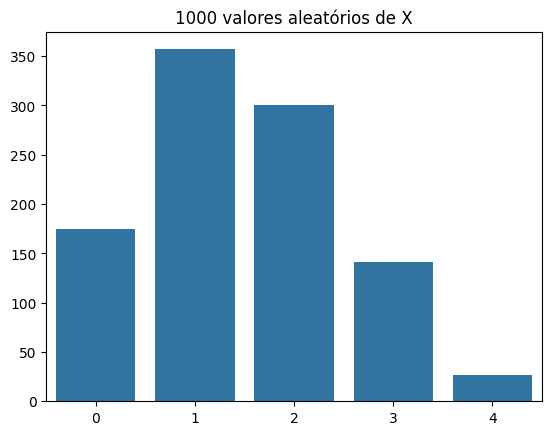

In [36]:
valores, frequencia = np.unique(valores_binom, return_counts=True)

sns.barplot(x=valores, y=frequencia)
plt.title('1000 valores aleatórios de X')
plt.show()


## Problema 20

Usando o procedimento recursivo 9.8, gere cinco valores de uma v.a. com distribuição de Poisson de parâmetro λ = 2.

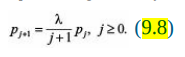

In [37]:
from math import factorial
lmbd = 2

j = 0
prob = ((np.e ** (lmbd * -1)) * (lmbd ** j)) / factorial(j)
F = prob

for _ in range(10):
  print(f'A probabilidade da v.a. de Poisson assumir o valor {j} é de {prob} e a acumulada é de {F}')
  prob *= lmbd / (j+1)
  F += prob
  j += 1

A probabilidade da v.a. de Poisson assumir o valor 0 é de 0.1353352832366127 e a acumulada é de 0.1353352832366127
A probabilidade da v.a. de Poisson assumir o valor 1 é de 0.2706705664732254 e a acumulada é de 0.4060058497098381
A probabilidade da v.a. de Poisson assumir o valor 2 é de 0.2706705664732254 e a acumulada é de 0.6766764161830635
A probabilidade da v.a. de Poisson assumir o valor 3 é de 0.18044704431548358 e a acumulada é de 0.8571234604985472
A probabilidade da v.a. de Poisson assumir o valor 4 é de 0.09022352215774179 e a acumulada é de 0.9473469826562889
A probabilidade da v.a. de Poisson assumir o valor 5 é de 0.036089408863096716 e a acumulada é de 0.9834363915193857
A probabilidade da v.a. de Poisson assumir o valor 6 é de 0.012029802954365572 e a acumulada é de 0.9954661944737513
A probabilidade da v.a. de Poisson assumir o valor 7 é de 0.0034370865583901633 e a acumulada é de 0.9989032810321414
A probabilidade da v.a. de Poisson assumir o valor 8 é de 0.00085927163

In [38]:
lmbd = 2
uniform = np.random.rand(1000)
poisson_vas = []

for u in uniform:
  v_a = False
  j = 0
  p = ((np.e ** (lmbd * -1)) * (lmbd ** j)) / factorial(j)
  F = p # Seja F a acumulada da v.a.

  while not v_a:
    if u < F:
      poisson_vas.append(j)
      v_a = True

    else:
      p *= lmbd / (j+1)
      F += p
      j += 1

poisson_vas[0:5]

[1, 1, 2, 1, 0]

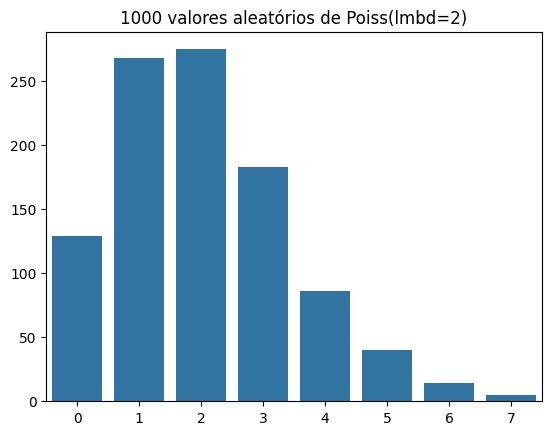

In [39]:
valores, frequencia = np.unique(poisson_vas, return_counts=True)

sns.barplot(x=valores, y=frequencia)
plt.title('1000 valores aleatórios de Poiss(lmbd=2)')
plt.show()

<Axes: ylabel='Count'>

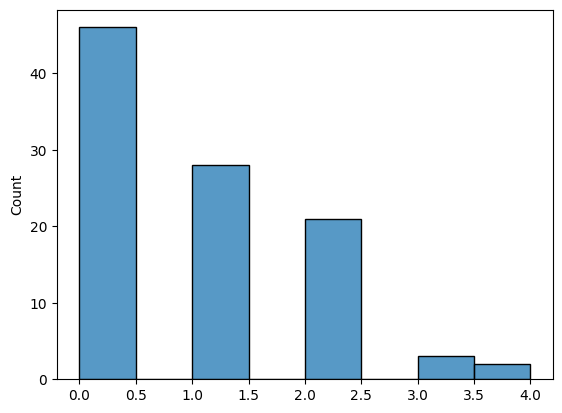

In [40]:
dias_sem_fumar = stats.poisson(1)
amostra = dias_sem_fumar.rvs(100)

sns.histplot(amostra)

## Problema 21

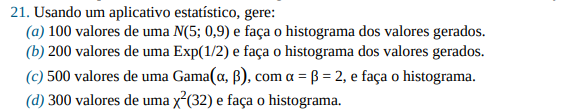

<Axes: ylabel='Count'>

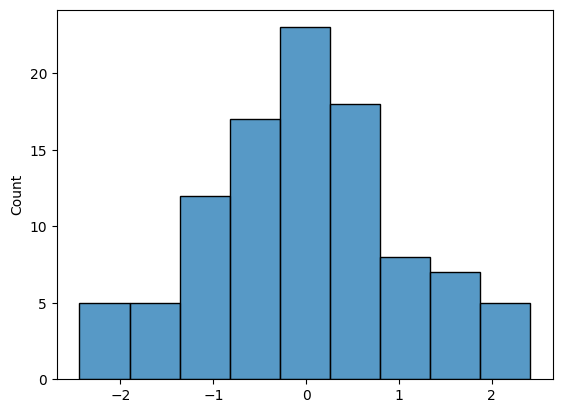

In [41]:
# Utilizando o método de Box-Müller
u1 = np.random.rand(100)
u2 = np.random.rand(100)
X = np.sqrt(-2 * np.log(u1)) * np.cos(2*np.pi*u2)
sns.histplot(X)

<Axes: ylabel='Count'>

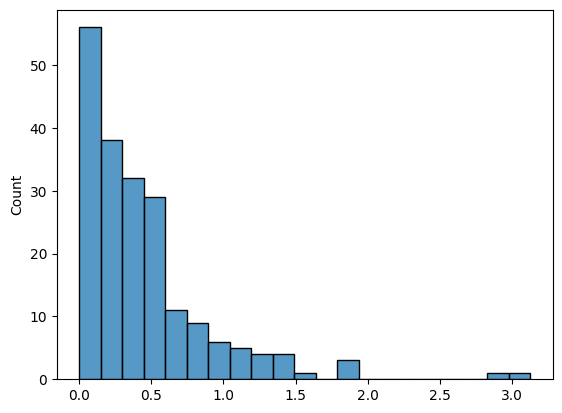

In [42]:
beta = 1/2
u = np.random.rand(200)
t = -beta * np.log(u) # t = -β log (u).
sns.histplot(t)

<Axes: ylabel='Count'>

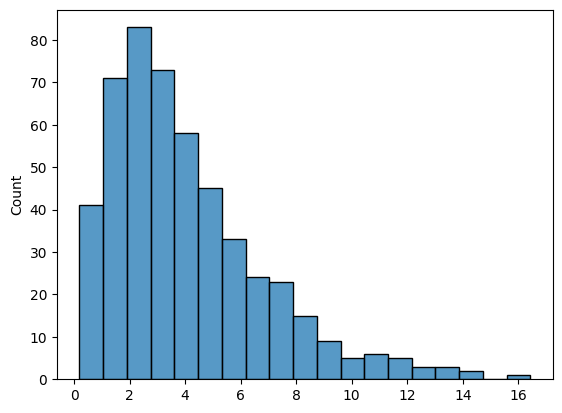

In [43]:
alpha = 2
beta = 2

u = np.random.rand(500 * alpha)
t = -beta * np.log(u)
t1, t2 = np.split(t, 2)

gama_d = t1 + t2

sns.histplot(gama_d)

<Axes: ylabel='Count'>

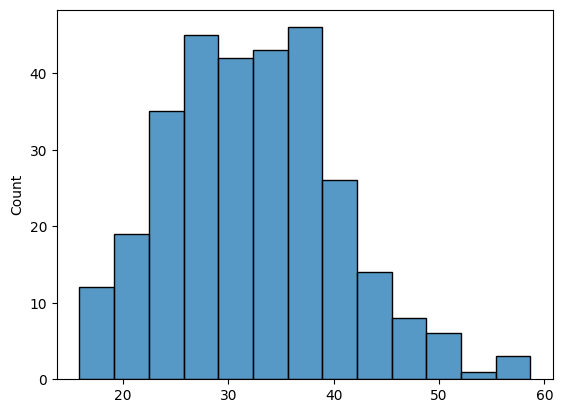

In [44]:
norm_vs = np.zeros(300)

for i in range(32):
  u = np.random.rand(300)
  norm_vs += norm.ppf(u) ** 2

sns.histplot(norm_vs)

## Problema 22

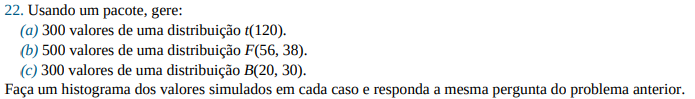

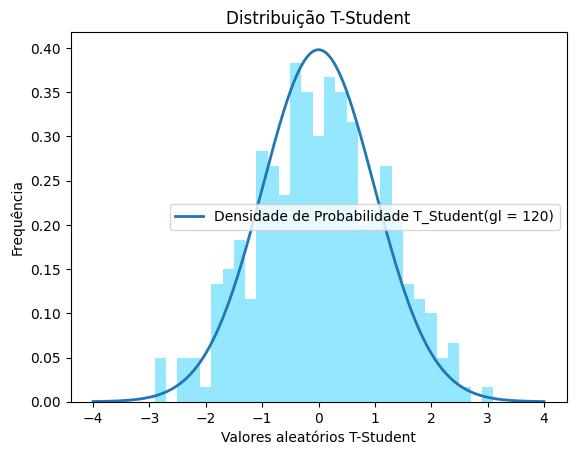

In [45]:
u = np.random.rand(300)
t_vs = stats.t(120).ppf(u)

eixo_x = np.linspace(-4,4,1000)
eixo_y = stats.t(120).pdf(eixo_x)

plt.plot(eixo_x, eixo_y, lw=2, label='Densidade de Probabilidade T_Student(gl = 120)')
plt.hist(t_vs, bins=30, density=True, color = '#94e7ff')
plt.legend()

plt.xlabel('Valores aleatórios T-Student')
plt.ylabel('Frequência')
plt.title('Distribuição T-Student')

plt.show()

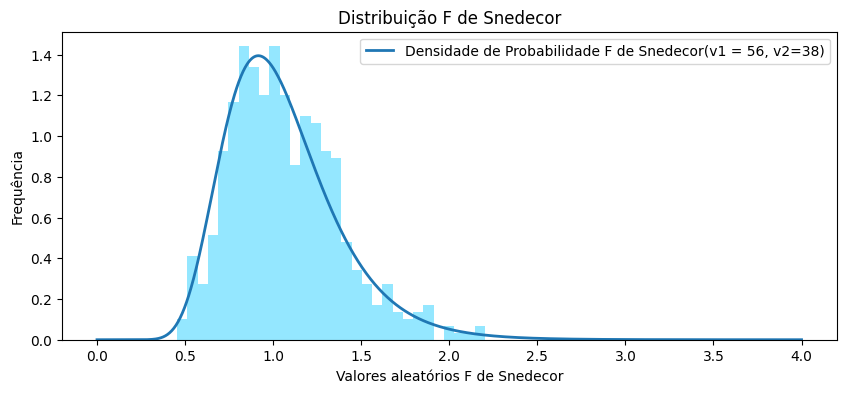

In [46]:
plt.figure(figsize=(10, 4))
chi1 = np.zeros(500)

v1 = 56
v2 = 38

for _ in range(v1):
  u = np.random.rand(500)
  chi1 += stats.norm.ppf(u) ** 2

chi2 = np.zeros(500)
for _ in range(v2):
  u = np.random.rand(500)
  chi2 += stats.norm.ppf(u) ** 2

snedecor_vs = (chi1 / v1) / (chi2 / v2)

eixo_x = np.linspace(0,4,1000)
eixo_y = stats.f(56, 38).pdf(eixo_x)

plt.plot(eixo_x, eixo_y, lw=2, label='Densidade de Probabilidade F de Snedecor(v1 = 56, v2=38)')
plt.hist(snedecor_vs, bins=30, density=True, color = '#94e7ff')
plt.legend(loc='upper right')

plt.xlabel('Valores aleatórios F de Snedecor')
plt.ylabel('Frequência')
plt.title('Distribuição F de Snedecor')

plt.show()

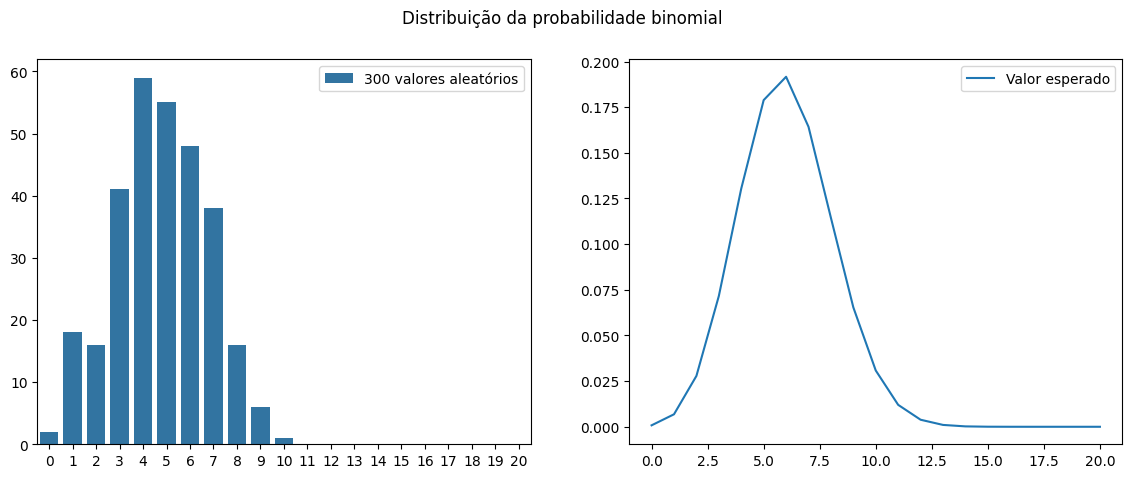

In [47]:
eixo_x = np.arange(0,21)
prob_acum = np.cumsum(stats.binom(n=20, p =0.3).pmf(eixo_x))

u = np.random.rand(300)
binom_vs = np.digitize(u, prob_acum)


fig, axs = plt.subplots(1, 2, figsize = (14, 5) )
valores, frequencia = np.unique(binom_vs, return_counts=True)

sns.barplot(x=eixo_x, y=np.append(frequencia, np.zeros( len(eixo_x) - len(frequencia) )), ax=axs[0], label='300 valores aleatórios')
sns.lineplot(stats.binom(n=20, p = 0.3).pmf(eixo_x), ax=axs[1], label='Valor esperado')
fig.suptitle('Distribuição da probabilidade binomial')
plt.legend()
plt.show()



## Problema 23

Simule cinco valores de uma distribuição Gama(3, 1.2) usando o procedimento descrito no CM-3

## Problema 24

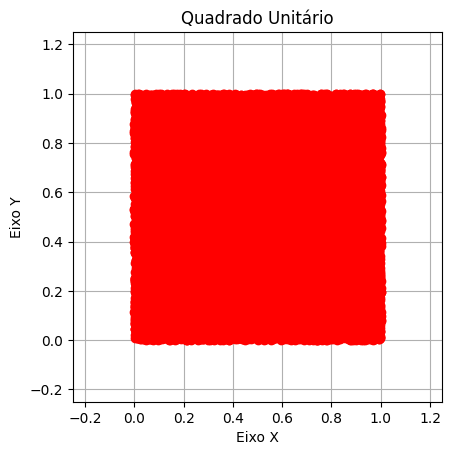

In [48]:
import matplotlib.pyplot as plt

# Criar uma figura e um eixo
fig, ax = plt.subplots()

# Desenhar o quadrado unitário
quadrado = plt.Rectangle((0, 0), 1, 1, color='lightblue')
ax.add_patch(quadrado)

# Definir os limites dos eixos
ax.set_xlim(-0.25, 1.25)
ax.set_ylim(-0.25, 1.25)

# Marcar pontos
u1 = np.random.rand(20000)
u2 = np.random.rand(20000)
plt.plot(u1, u2, 'ro')  # 'ro' representa um ponto vermelho ('r') com estilo de marcador de ponto ('o')

# Adicionar rótulos
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Quadrado Unitário')

# Exibir o gráfico
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Garantir proporção igual nos eixos
plt.show()

In [49]:
separadores = np.arange(0, 1.2, 0.2)
cluster_x = np.digitize(u1, bins=separadores)
cluster_y = np.digitize(u2, bins=separadores)

pareado_zip = list(zip(cluster_x, cluster_y))
pareado_matriz = np.array(pareado_zip)

valores, frequencia = np.unique(pareado_matriz, axis=0, return_counts=True)

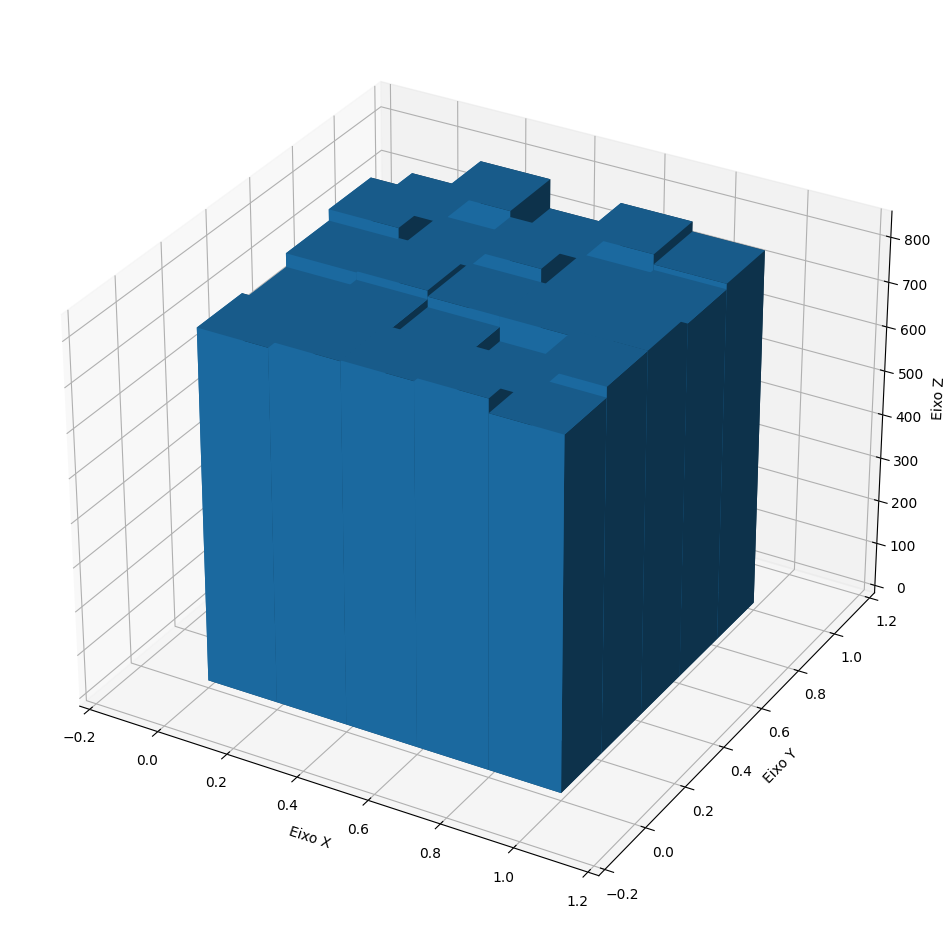

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Dados para as barras
x = np.repeat([0, 0.2, 0.4, 0.6, 0.8], np.full(5, 5))
y = np.tile([0, 0.2, 0.4, 0.6, 0.8], 5)
z = np.zeros(25)  # Nível base para cada barra
largura = profundidade = 0.2
altura = frequencia  # Altura de cada barra

# Criar uma figura e um eixo 3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Plotar as barras 3D
ax.bar3d(x, y, z, largura, profundidade, altura)

# Configurar a escala dos eixos
ax.set_xticks(np.arange(-.2, 1.4, 0.2))  # Escala do eixo X
ax.set_yticks(np.arange(-.2, 1.4, 0.2))  # Escala do eixo Y

# Adicionar rótulos
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')


# Exibir a figura
plt.show()
